<a href="https://colab.research.google.com/github/joshIsac/quantumcomputing/blob/main/2348523_Teleportation_protocol_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Teleportation Protocol
The objective of this technique is to transmit one qubit between Alice and Bob by sending two classical bits. However, Alice and Bob must initially share one entangled state.

In [1]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_histogram

In [9]:
#Using Numpy to illustrate how Alice transmits the qubits to Bob

#define the basis state 
zero= np.array([[1], [0]])
one= np.array([[0], [1]])


# define Hadamard ,Pauli-X and Pauli-Y
X=np.array(([0,1],[1,0]))
Z = np.array([[1, 0], [0, -1]])
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])

#psi for Qubit Q
alpha,beta=1/np.sqrt(2),1j/np.sqrt(2)
psi=alpha*zero+beta*one


#bell state 
bell_state=(np.kron(zero, zero) + np.kron(one, one)) / np.sqrt(2)

# Initial state: |ψ⟩ ⊗ |Φ+⟩
initial_state = np.kron(psi, bell_state)
print("Combined initial state |ψ⟩ ⊗ |Φ+⟩:\n", initial_state)


Combined initial state |ψ⟩ ⊗ |Φ+⟩:
 [[0.5+0.j ]
 [0. +0.j ]
 [0. +0.j ]
 [0.5+0.j ]
 [0. +0.5j]
 [0. +0.j ]
 [0. +0.j ]
 [0. +0.5j]]


In [11]:
# Define CNOT gate for Q -> A on a 3-qubit system
CNOT_QA = np.kron(np.array([[1, 0, 0, 0],
                            [0, 1, 0, 0],
                            [0, 0, 0, 1],
                            [0, 0, 1, 0]]), np.eye(2))

# Define Hadamard gate for Q on a 3-qubit system
H_Q = np.kron(np.kron(H, np.eye(2)), np.eye(2))

# Apply CNOT(Q, A) and H(Q)
after_gates_state = H_Q @ CNOT_QA @ initial_state
print("State after CNOT(Q, A) and H(Q):\n", after_gates_state)

State after CNOT(Q, A) and H(Q):
 [[0.35355339+0.j        ]
 [0.        +0.35355339j]
 [0.        +0.35355339j]
 [0.35355339+0.j        ]
 [0.35355339+0.j        ]
 [0.        -0.35355339j]
 [0.        -0.35355339j]
 [0.35355339+0.j        ]]


In [3]:
#Let Q be the Qubit that is to be transmitted to B from A
Q=QuantumRegister(1,"Q")
A=QuantumRegister(1,"A")
B=QuantumRegister(1,"B")
a=ClassicalRegister(1,"a")
b=ClassicalRegister(1,"b")


circuit=QuantumCircuit(Q,A,B,a,b)

circuit.h(A)
circuit.cx(A,B)
circuit.barrier()

#Alice 
circuit.cx(Q,A)
circuit.h(Q)
circuit.barrier()


CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'Q'), 0), Qubit(QuantumRegister(1, 'A'), 0), Qubit(QuantumRegister(1, 'B'), 0)), clbits=())

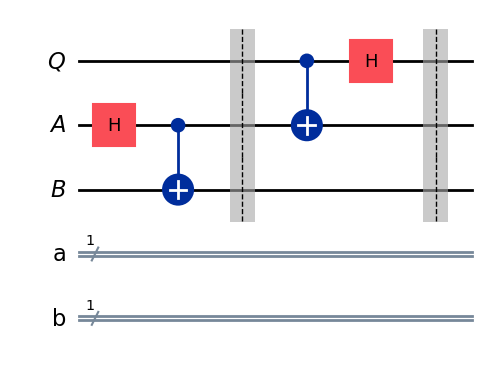

In [4]:
display(circuit.draw("mpl"))

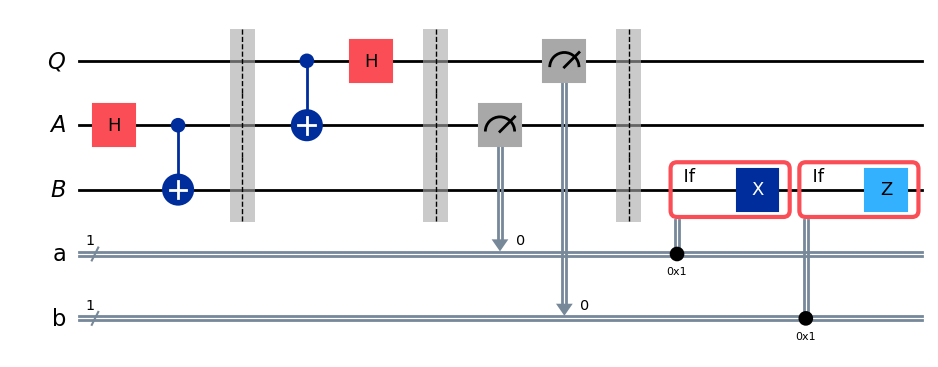

In [5]:
circuit.measure(A,a)
circuit.measure(Q,b)
circuit.barrier()


#check if Bob uses classical bits to apply the gates
with circuit.if_test((a, 1)):
    circuit.x(B)
with circuit.if_test((b, 1)):
    circuit.z(B)

display(circuit.draw("mpl"))

